# Mental Health in Tech Industry Analysis 2014-2019
### *author: Celine Ng*
### *April 2024*

# Table of Contents 
1. Notebook Preparation
    1.1 Libraries Installation
    1.2 Data Retrieval
    1.3 Initial Data Cleaning
2. Dataset 'Answer'
    2.1 Overview of the Surveys Over the Years
        2.1.1 Insights
    2.2 Survey Questions
        2.2.1 Insights
3. Questions Available In All Surveys
    3.1 Data Cleaning
        3.1.1 QuestionID 1

# 1. Notebook preparation
## 1.1 Libraries Installation

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

## 1.2 Data Retrieval
Objective: Preview datasets and have a general understanding of each of the 
tables.

Create a relative path to the SQLite database and connect to the SQLite 
database

In [3]:
database_path = 'mental_health.sqlite'
conn = sql.connect(database_path)

Check how many tables is in the database and the names of them

In [4]:
query = 'SELECT name FROM sqlite_master WHERE type="table";'
tables = pd.read_sql_query(query, conn)
print(tables)

       name
0    Answer
1  Question
2    Survey


**Answer**

In [5]:
answer_df = pd.read_sql('SELECT * FROM Answer', conn)
answer_df

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


In [6]:
answer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236898 entries, 0 to 236897
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   AnswerText  236898 non-null  object
 1   SurveyID    236898 non-null  int64 
 2   UserID      236898 non-null  int64 
 3   QuestionID  236898 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.2+ MB


In [7]:
answer_df.UserID.nunique()

4218

There are 236898 columns in the Answer dataset, with 2 foreign keys, 
SurveyID and QuestionID. 
In total, 4218 people answered the survey.

**Question**

In [8]:
question_df = pd.read_sql('SELECT * FROM Question', conn)
question_df

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers woul...,114
101,"If yes, what condition(s) have you been diagno...",115
102,"If maybe, what condition(s) do you believe you...",116
103,Which of the following best describes your wor...,117


In [9]:
question_df.columns = ['questiontext', 'QuestionID']

In [10]:
question_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   questiontext  105 non-null    object
 1   QuestionID    105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


There are 105 distinct questions. The dataset includes a primary key,
questionID.

**Survey**

In [11]:
survey_df = pd.read_sql('SELECT * FROM Survey', conn)
survey_df

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [12]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SurveyID     5 non-null      int64 
 1   Description  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


We have a missing year 2015. This dataset includes a primary key, SurveyID.

## 1.3 Initial Data Cleaning
Objective: Check for missing values and duplicates 

In [13]:
datasets = [answer_df, question_df, survey_df]

1. Check for duplicates in each dataset.

In [14]:
for dataset in datasets:
    print(dataset.duplicated().any())

False
False
False


2. Check for missing values in each dataset.

In [15]:
for dataset in datasets:
    print(dataset.isna().any().any())

False
False
False


There is no missing values or duplicated rows in all 3 datasets.

# 2. Dataset 'Answer'
## 2.1 Overview of the Surveys Over the Years

Objective: 
Have a better understanding of how the surveys were constructed over the 
years.

1. How many total replies have there been over time?

In [16]:
query = '''SELECT SurveyID, COUNT(1) AS TotalAnswers
 FROM Answer 
 GROUP BY SurveyID;
 ''' 

answers_over_time = pd.read_sql_query(query, conn)
answers_over_time

,SurveyID,TotalAnswers
0,2014,32760
1,2016,88238
2,2017,57456
3,2018,31692
4,2019,26752


<Axes: xlabel='SurveyID', ylabel='TotalAnswers'>

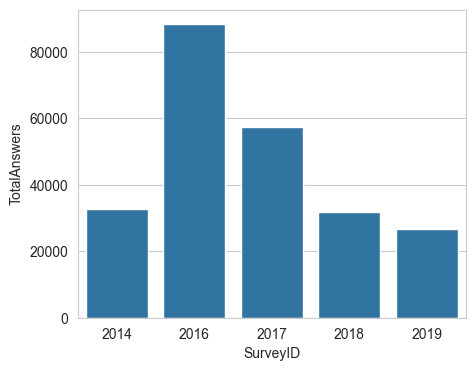

In [17]:
plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.barplot(data=answers_over_time, x='SurveyID', y='TotalAnswers')

The number of replies started at 32760 in 2014, then at 2016, it reached its
 highest at 88238. The replies since then, have decreased reaching its 
 lowest in 2019. 
 Let's investigate what is happening with the number of replies. Is it the 
 number of users going  down? Is it the number of questions per survey going 
 down?

2. How many users have replied for each survey? 

In [18]:
query = '''SELECT SurveyID, COUNT(DISTINCT UserID) AS TotalUsers
 FROM Answer 
 GROUP BY SurveyID;
 ''' 

users_over_time = pd.read_sql_query(query, conn)
users_over_time

,SurveyID,TotalUsers
0,2014,1260
1,2016,1433
2,2017,756
3,2018,417
4,2019,352


<Axes: xlabel='SurveyID', ylabel='TotalUsers'>

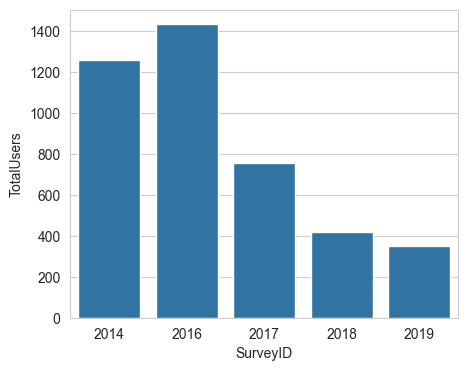

In [19]:
plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.barplot(data=users_over_time, x='SurveyID', y='TotalUsers')

The number of users (people that replied to the survey) are highest in 2016,
 1433 users, and interestingly the second highest in 2014, with 2019 being the 
 lowest with 352 users. 
 The evolution of the number of users and number of replies is more consistent 
 between 2016-2019. 2014 is an outlier.

3. Did all the surveys have the same questions? And how many replies did 
each get?

In [20]:
query = '''SELECT SurveyID, QuestionID, COUNT(1) AS TotalReplies
FROM Answer
GROUP BY SurveyID, QuestionID;
'''

questions_for_each_survey = pd.read_sql_query(query, conn)
questions_for_each_survey

,SurveyID,QuestionID,TotalReplies
0,2014,1,1260
1,2014,2,1260
2,2014,3,1260
3,2014,4,1260
4,2014,5,1260
...,...,...,...
309,2019,85,352
310,2019,86,352
311,2019,87,352
312,2019,88,352


The Surveys do not all have the same questions, although some are in common.

4. Check if all questions had the same amount of replies as the number of 
users.

In [21]:
merged_df = questions_for_each_survey.merge(users_over_time, on='SurveyID')
odd_number_of_replies = merged_df[merged_df.TotalUsers != merged_df
.TotalReplies]
odd_number_of_replies

,SurveyID,QuestionID,TotalReplies,TotalUsers
82,2016,115,2072,1433
83,2016,116,1793,1433
84,2016,117,2692,1433


In [22]:
query = '''SELECT *
FROM Answer
WHERE SurveyID=2016 AND QuestionID BETWEEN 115 AND 117;
'''

pd.read_sql_query(query, conn)

,AnswerText,SurveyID,UserID,QuestionID
0,-1,2016,1261,115
1,"Anxiety Disorder (Generalized, Social, Phobia,...",2016,1262,115
2,"Mood Disorder (Depression, Bipolar Disorder, etc)",2016,1262,115
3,-1,2016,1263,115
4,"Anxiety Disorder (Generalized, Social, Phobia,...",2016,1264,115
...,...,...,...,...
6552,Other,2016,2689,117
6553,Support,2016,2690,117
6554,Back-end Developer,2016,2691,117
6555,DevOps/SysAdmin,2016,2692,117


In the questions 115-117 from year 2016, several users answered more than 
one times.

5. How many questions did each survey have?

In [23]:
questions_per_survey = questions_for_each_survey.groupby(by='SurveyID').size()
questions_per_survey = questions_per_survey.reset_index()
questions_per_survey.columns = ['SurveyID', 'count']
questions_per_survey

,SurveyID,count
0,2014,26
1,2016,60
2,2017,76
3,2018,76
4,2019,76


<Axes: xlabel='SurveyID', ylabel='count'>

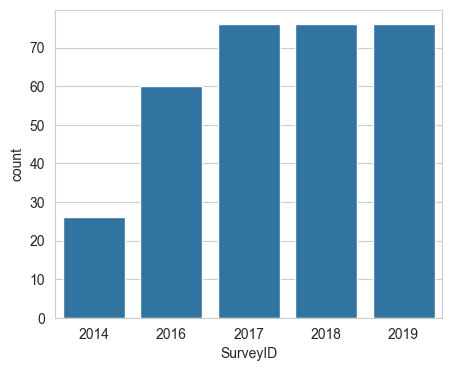

In [24]:
plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.barplot(data=questions_per_survey, x='SurveyID', y='count')

2014 and 2016 both have less questions than the rest. 
Even though, 2014 had many users, it only had around 34% of number of questions 
compared to the surveys 2017-2019, which significantly decreased the amount of
replies it was getting.

6. Any users replied to several surveys ?

In [25]:
query = '''SELECT UserID, COUNT(DISTINCT SurveyID) AS NumberOfSurveys
FROM Answer
GROUP BY UserID
HAVING NumberOfSurveys>1;
'''

pd.read_sql_query(query, conn)

,UserID,NumberOfSurveys


No, all users only appear in one survey.

### 2.1.1 Insights
The surveys are not the same over the years and the sampling population is 
also not the same. 
To analyze the survey replies changes throughout the years, prioritizing our 
analysis to survey questions that were repeatedly asked will help its 
accuracy.

## 2.2 Survey Questions
Objective: 
Find questions that were asked repeatedly in different surveys.

1. Join the table Answer with Question.

In [26]:
query = '''SELECT *
FROM Answer
JOIN Question ON Answer.QuestionID = Question.questionid;
'''

answer_question_merged = pd.read_sql_query(query, conn)
answer_question_merged

,AnswerText,SurveyID,UserID,QuestionID,questiontext,questionid
0,37,2014,1,1,What is your age?,1
1,44,2014,2,1,What is your age?,1
2,32,2014,3,1,What is your age?,1
3,31,2014,4,1,What is your age?,1
4,31,2014,5,1,What is your age?,1
...,...,...,...,...,...,...
236893,Other,2016,2689,117,Which of the following best describes your wor...,117
236894,Support,2016,2690,117,Which of the following best describes your wor...,117
236895,Back-end Developer,2016,2691,117,Which of the following best describes your wor...,117
236896,DevOps/SysAdmin,2016,2692,117,Which of the following best describes your wor...,117


2. Which questions were repeated in the surveys throughout the years ?

In [27]:
query = '''SELECT QuestionID, COUNT(DISTINCT SurveyID) AS 
RepeatedQuestions
FROM Answer
GROUP BY QuestionID;
'''

repeated_questions = pd.read_sql_query(query, conn)
repeated_questions

,QuestionID,RepeatedQuestions
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5
...,...,...
100,114,1
101,115,1
102,116,1
103,117,1


<Axes: xlabel='RepeatedQuestions', ylabel='count'>

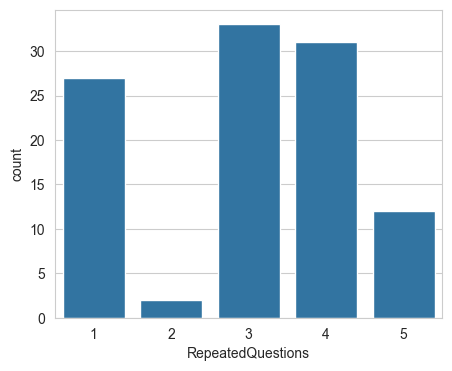

In [28]:
plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.countplot(data=repeated_questions, x='RepeatedQuestions')

3. Which survey did these questions belong to?

In [29]:
questions_for_each_survey[questions_for_each_survey.QuestionID>91]

,SurveyID,QuestionID,TotalReplies
14,2014,92,1260
15,2014,93,1260
16,2014,94,1260
17,2014,95,1260
18,2014,96,1260
19,2014,97,1260
20,2014,98,1260
21,2014,99,1260
22,2014,100,1260
23,2014,101,1260


In [30]:
questions_for_each_survey.SurveyID[(questions_for_each_survey.QuestionID==90)|
(questions_for_each_survey.QuestionID==91)].unique()

array([2014, 2016], dtype=int64)

In [31]:
questions_for_each_survey.SurveyID[(questions_for_each_survey.QuestionID>=57)&
(questions_for_each_survey.QuestionID<=89)].unique()

array([2017, 2018, 2019], dtype=int64)

In [32]:
questions_for_each_survey.SurveyID[(questions_for_each_survey.QuestionID>=13)&
(questions_for_each_survey.QuestionID<=56)].unique()

array([2016, 2017, 2018, 2019], dtype=int64)

Some questions from 2014 lasted until the 2019 survey.
However, a lot from 2014 and 2016 were removed or replaced by new questions. 
2017, 2018 and 2019 share a lot of same questions, let's see if they are the 
same.

4. Did the last 3 surveys have exactly the same questions?

In [33]:
questions_2017 = questions_for_each_survey[questions_for_each_survey['SurveyID'] == 
                    2017]['QuestionID']
questions_2018 = questions_for_each_survey[questions_for_each_survey['SurveyID'] == 2018]['QuestionID']
questions_2019 = questions_for_each_survey[questions_for_each_survey['SurveyID'] == 2019]['QuestionID']


same_questions1718 = set(questions_2017) == set(questions_2018)
same_questions1719 = set(questions_2017) == set(questions_2019)


print("Does 2017 have the same questions as 2018?:", same_questions1718)
print("Does 2017 have the same questions as 2018?:", same_questions1719)

Does 2017 have the same questions as 2018?: True
Does 2017 have the same questions as 2018?: True


The surveys are the same. This will help analysis.

### 2.2.1 Insights
We have located the questions that were repeated in all surveys and the 
surveys 2017, 2018, 2019 are the same. The focus of our analysis will be 
these questions.

# 3. Questions Available In All Surveys - Data Cleaning

In [34]:
combined_df = repeated_questions.merge(question_df, on='QuestionID')
combined_df

,QuestionID,RepeatedQuestions,questiontext
0,1,5,What is your age?
1,2,5,What is your gender?
2,3,5,What country do you live in?
3,4,5,"If you live in the United States, which state ..."
4,5,5,Are you self-employed?
...,...,...,...
100,114,1,Do you think that team members/co-workers woul...
101,115,1,"If yes, what condition(s) have you been diagno..."
102,116,1,"If maybe, what condition(s) do you believe you..."
103,117,1,Which of the following best describes your wor...


In [35]:
questions_in_all_surveys = combined_df[combined_df.RepeatedQuestions==5]
questions_in_all_surveys

,QuestionID,RepeatedQuestions,questiontext
0,1,5,What is your age?
1,2,5,What is your gender?
2,3,5,What country do you live in?
3,4,5,"If you live in the United States, which state ..."
4,5,5,Are you self-employed?
5,6,5,Do you have a family history of mental illness?
6,7,5,Have you ever sought treatment for a mental he...
7,8,5,How many employees does your company or organi...
8,9,5,Is your employer primarily a tech company/orga...
9,10,5,Does your employer provide mental health benef...


In [36]:
query = '''SELECT *
FROM Answer
WHERE QuestionID<12;
'''

answer_df_questions_all_survey = pd.read_sql_query(query, conn)
answer_df_questions_all_survey

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
46393,I don't know,2019,4214,11
46394,-1,2019,4215,11
46395,-1,2019,4216,11
46396,Yes,2019,4217,11


## 3.1 Find Odd Values
Objective:
Separate the data into one dataset per survey question.
Adjust data of each dataset depending on the type of AnswerText.

Create separate dataframes for each question, so each can be separately 
treated.

In [101]:
questions = []

for i in range(questions_in_all_surveys.QuestionID.size):
                                   
    query = f'''
    SELECT *
    FROM Answer
    WHERE QuestionID={i+1};
    '''
    question = pd.read_sql_query(query, conn)
    questions.append(question)

### 3.1.1 QuestionID 1

Question 1 answers are numbers but are typed as object. Let's change it to 
numeric.

In [38]:
questions[0]['AnswerText'] = pd.to_numeric(questions[0]['AnswerText'], 
                                            errors='coerce')

The age range is huge, with meaningless min and max values.

In [39]:
questions[0].describe()

,AnswerText,SurveyID,UserID,QuestionID
count,4218.000000,4218.000000,4218.000000,4218.0
mean,33.915363,2016.029872,2109.500000,1.0
std,10.478054,1.587555,1217.776047,0.0
min,-29.000000,2014.000000,1.000000,1.0
25%,28.000000,2014.000000,1055.250000,1.0
50%,33.000000,2016.000000,2109.500000,1.0
75%,38.000000,2017.000000,3163.750000,1.0
max,329.000000,2019.000000,4218.000000,1.0


Since many countries worldwide allow only 14 or above years olds to work, 
any answers under 14 and over 100 are most likely typo or users refusing to 
reveal their age. Therefor are considered None. 

In [40]:
questions[0]['AnswerText'] = (questions[0]['AnswerText']
                                      .apply(lambda x: x if 14<=x<=100 else 
None))

### 3.1.2 QuestionID 2

Answers for this question include 'female', 'male', '-1' and a variety of 
genders. 
Due to the wide range of different answers, '-1' is considered *None*
 and any other than 'female' and 'male' are 'other'.

In [59]:
questions[1]['AnswerText'] = questions[1]['AnswerText'].str.lower()
questions[1]['AnswerText'] = questions[1]['AnswerText'].apply(lambda x: None
if x=='-1' else (x if x in ['female', 'male'] else 'other'))

True

### 3.1.3 QuestionID 3

Replaced repeated country name written in different formats and considered 
'-1' values as 'None'

In [66]:
questions[2]['AnswerText'] = questions[2]['AnswerText'].replace('-1', None)
questions[2]['AnswerText'] = questions[2]['AnswerText'].replace('United '
                                                                'States', 'United States of America')

### 3.1.4 QuestionID 4

Replaced repeated state names written in different formats and considered 
'-1' values as 'None'

In [74]:
questions[3]['AnswerText'] = questions[3]['AnswerText'].replace('-1', None)
questions[3]['AnswerText'] = questions[3]['AnswerText'].replace('DC', 
                                                                'District of Columbia')

### 3.1.5 Question 5

Consider
-1: None
1: True
0: False

In [106]:
def to_boolean_none(x):
    if x == -1:
        return None 
    elif x == 1:
        return True
    elif x == 0:
        return False
    else:
        return x

questions[4]['AnswerText'] = pd.to_numeric(questions[4]['AnswerText'], 
                                            errors='coerce')
questions[4]['AnswerText'] = (questions[4]['AnswerText'].apply
                              (to_boolean_none))

### 3.1.6 Question 6
No values issues

In [133]:
def yes_no_to_boolean(x):
    if x == '-1':
        return None 
    elif x == 'Yes':
        return True
    elif x == 'No':
        return False
    else:
        return x
    
questions[5]['AnswerText'] = (questions[5]['AnswerText'].apply
                              (yes_no_to_boolean))

### 3.1.7 Question 7

In [108]:
questions[6]['AnswerText'] = pd.to_numeric(questions[6]['AnswerText'], 
                                            errors='coerce')
questions[6]['AnswerText'] = (questions[6]['AnswerText'].apply
                              (to_boolean_none))

### 3.1.8 Question 8

In [117]:
questions[7]['AnswerText'] = questions[7]['AnswerText'].replace('-1', None)

### 3.1.9 Question 9

In [120]:
questions[8]['AnswerText'] = pd.to_numeric(questions[8]['AnswerText'], 
                                            errors='coerce')
questions[8]['AnswerText'] = (questions[8]['AnswerText'].apply
                              (to_boolean_none))

### 3.1.10 Question 10

In [137]:
questions[9]['AnswerText'] = questions[9]['AnswerText'].replace("Don't "
                                                                "know", "I don't know")
questions[9]['AnswerText'] = (questions[9]['AnswerText'].apply
                              (yes_no_to_boolean))

### 3.1.11 Question 11

In [143]:
questions[10]['AnswerText'] = (questions[10]['AnswerText'].apply
                              (yes_no_to_boolean))
questions[10]['AnswerText'] = questions[10]['AnswerText'].replace("Don't "
                                                                "know", "I don't know")

### 3.1.12 Question 12

In [147]:
questions[11]['AnswerText'] = (questions[11]['AnswerText'].apply
                              (yes_no_to_boolean))

<Axes: xlabel='None'>

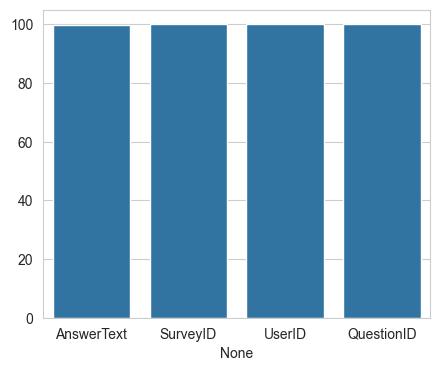

In [42]:
available_data = (1-questions[0].isnull().mean())*100

plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.barplot(x=available_data.index, y=available_data
            .values)

## 3.2 User Description
Objective: 
Understand who is answering these surveys, the background of our 
users.

**QuestionID 1. 'What is your age?'**

In [43]:
answer_to_question_1.describe()

NameError: name 'answer_to_question_1' is not defined

1. Data Cleaning - treating outliers

In [ ]:
answer_to_question_1['AnswerText'] = (answer_to_question_1['AnswerText']
                                      .apply(lambda x: x if 14<=x<=100 else 
pd.NA))

In [ ]:
available_data = (1-answer_to_question_1.isna().mean())*100

In [ ]:
available_data = (1-answer_to_question_1.isna().mean())*100
plt.figure(figsize=(5, 4))
sns.set_style(style='whitegrid')
sns.barplot(x=available_data.index, y=available_data
            .values)

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_style(style='whitegrid')
sns.histplot(data=answer_to_question_1, x='AnswerText', hue='SurveyID',  element='step', stat='count', common_norm=False)